<a href="https://colab.research.google.com/github/edendavido/JavaProgramNew/blob/master/Social_Media_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project

Eden Journo 332389014


Noa gabay 206003410

Eden Davidovici 804810


# Новый раздел

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 36.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 51.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 12.3 MB/s eta 0:00:00


In [ ]:
import tweepy 
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#twitter API credentials

client_id = "ZXBPdTFIQklST1A0d0ZkblRzZDM6MTpjaQ"
clinet_secret = "elvyuND7tbyxxcdXOUFCJgdFep7ap1zs76x2_rr2aLYEF2As4W"
api_key = "GaxH9qqd2jUZ0Z5ehJ5JwgXTG"
api_secret = "dZQtsDX8kX2UD8oaSiptytr4dOItWbJgxVsbGSv424IcCTDpaN"
bearer_token = "AAAAAAAAAAAAAAAAAAAAANrVlwEAAAAAVVPRx7vZC8sMJOBWyjRskGZkkhg%3DqN2kXQU7Kbz85oWFtuCN0AN3ktPtspdFSssBpgEEdAYjR7JjZo"
access_token = "1416080044523393029-D5J4XI6BNgfiJPIUuUdYUAnqymZdBk"
access_secret = "VxpvZsUDtbqomzLrpg06kQgUBcoLphmDy7IBDOBYfUHCy"

In [ ]:
pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 KB 3.0 MB/s eta 0:00:00


In [ ]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import snscrape.modules.twitter as sntwitter
import pandas as pd


# Kylie Skin


In [ ]:
query = "kylieskin"
tweets = []
limit = 300

for tweet in sntwitter.TwitterSearchScraper(query).get_items():
  if len(tweets)==limit:
    break
  else:
    tweets.append([tweet.date, tweet.user.username, tweet.content, tweet.likeCount])
df = pd.DataFrame(tweets, columns = [ 'Date', 'User','Tweet', 'Likes'])
df['id'] = range(1, len(df) + 1)
print(df)



<ipython-input-176-b2571d7519a5>:9: FutureWarning: content is deprecated, use rawContent instead
  tweets.append([tweet.date, tweet.user.username, tweet.content, tweet.likeCount])


                         Date            User  ... Likes   id
0   2023-02-26 00:14:01+00:00  Selena_Trenham  ...     0    1
1   2023-02-25 20:29:07+00:00     LinaSofie11  ...     1    2
2   2023-02-25 17:04:32+00:00       kylieskin  ...    57    3
3   2023-02-25 13:22:19+00:00   Ferdi90911289  ...     0    4
4   2023-02-25 12:16:02+00:00  LehrenNetworks  ...     0    5
..                        ...             ...  ...   ...  ...
295 2023-01-04 20:22:36+00:00       kylieskin  ...    85  296
296 2023-01-04 19:07:56+00:00       NdukaFBGM  ...     0  297
297 2023-01-04 14:05:27+00:00        CielSpa_  ...     0  298
298 2023-01-04 07:45:10+00:00   ThomasjulianD  ...     0  299
299 2023-01-04 01:45:06+00:00         vronemm  ...     0  300

[300 rows x 5 columns]


In [ ]:
df.head()

,Date,User,Tweet,Likes,id
0,2023-02-26 00:14:01+00:00,Selena_Trenham,Officially obsessed with @kylieskin lip oil.,0,1
1,2023-02-25 20:29:07+00:00,LinaSofie11,I’m excited for another brand to partner with ...,1,2
2,2023-02-25 17:04:32+00:00,kylieskin,face &amp; body hydrating must-haves! 🤍 shop o...,57,3
3,2023-02-25 13:22:19+00:00,Ferdi90911289,@KylieJenner @kyliecosmetics @kylieskin @Sepho...,0,4
4,2023-02-25 12:16:02+00:00,LehrenNetworks,#kyliejenner #selenagomez #kimkardashian #kend...,0,5


In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
roberta = "cardiffnlp/twitter-roberta-base-sentiment"
model = AutoModelForSequenceClassification.from_pretrained(roberta)
tokenizer = AutoTokenizer.from_pretrained(roberta)
labels = ['Negative', 'Neutral', 'Positive']

In [ ]:

import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Tweet']
    myid = row['id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/300 [00:00<?, ?it/s]

In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'id'})
vaders = vaders.merge(df, how='left')

In [ ]:
vaders.head()

,id,neg,neu,pos,compound,Date,User,Tweet,Likes
0,1,0.254,0.746,0.000,-0.1779,2023-02-26 00:14:01+00:00,Selena_Trenham,Officially obsessed with @kylieskin lip oil.,0
1,2,0.000,0.806,0.194,0.3400,2023-02-25 20:29:07+00:00,LinaSofie11,I’m excited for another brand to partner with ...,1
2,3,0.000,1.000,0.000,0.0000,2023-02-25 17:04:32+00:00,kylieskin,face &amp; body hydrating must-haves! 🤍 shop o...,57
3,4,0.000,0.575,0.425,0.5719,2023-02-25 13:22:19+00:00,Ferdi90911289,@KylieJenner @kyliecosmetics @kylieskin @Sepho...,0
4,5,0.000,1.000,0.000,0.0000,2023-02-25 12:16:02+00:00,LehrenNetworks,#kyliejenner #selenagomez #kimkardashian #kend...,0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

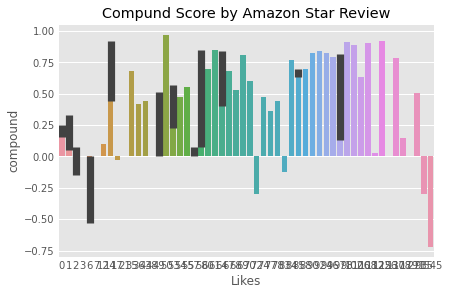

In [ ]:
ax = sns.barplot(data=vaders, x='Likes', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

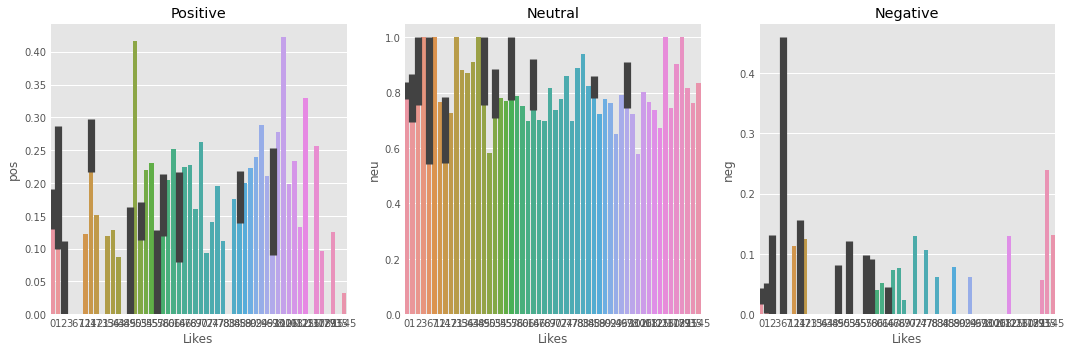

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(data=vaders, x='Likes', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Likes', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Likes', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)


In [ ]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Tweet']
        myid = row['id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/300 [00:00<?, ?it/s]

In [ ]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'id'})
results_df = results_df.merge(df, how='left')

In [ ]:
results_df.columns

Index(['id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'Date', 'User', 'Tweet',
       'Likes'],
      dtype='object')

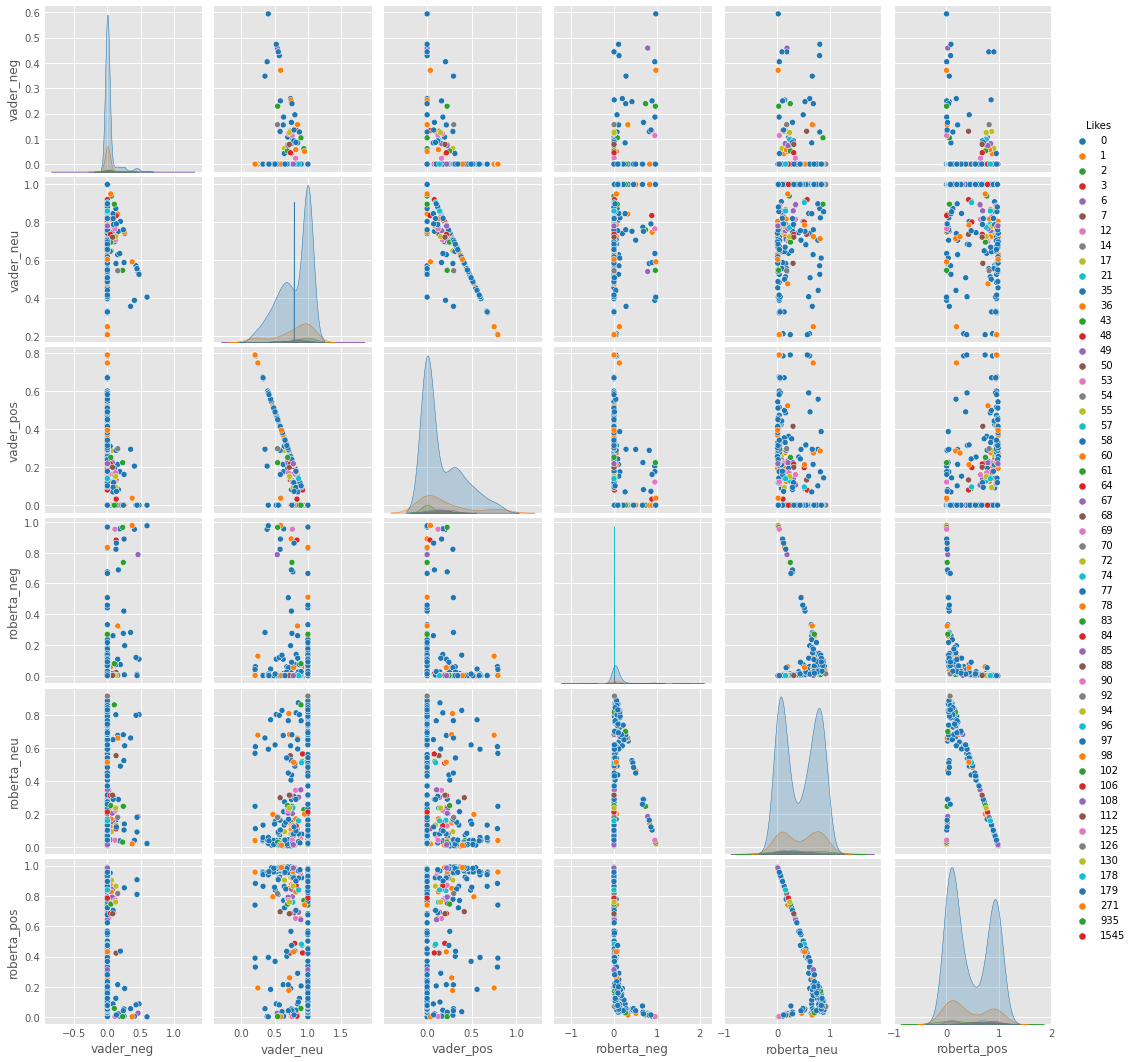

In [ ]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Likes',
            palette='tab10')
plt.show()

# KKW Beauty


In [ ]:
query = "KKW beauty lang:en"
tweets = []
limit = 300

for tweet in sntwitter.TwitterSearchScraper(query).get_items():
  if len(tweets)==limit:
    break
  else:
    tweets.append([tweet.date, tweet.user.username, tweet.content, tweet.likeCount])
kim_df = pd.DataFrame(tweets, columns = [ 'Date', 'User','Tweet', 'Likes'])
kim_df['id'] = range(1, len(df) + 1)
print(kim_df)

<ipython-input-198-0cc90baba4f2>:9: FutureWarning: content is deprecated, use rawContent instead
  tweets.append([tweet.date, tweet.user.username, tweet.content, tweet.likeCount])


                         Date             User  ... Likes   id
0   2023-02-26 02:11:21+00:00   amanda_amaro13  ...     0    1
1   2023-02-25 21:33:57+00:00          LRNROSE  ...    55    2
2   2023-02-24 21:16:44+00:00       noellexxox  ...     1    3
3   2023-02-24 02:11:24+00:00     kaylahogann_  ...     1    4
4   2023-02-23 22:10:46+00:00     sharayahsade  ...     1    5
..                        ...              ...  ...   ...  ...
295 2022-10-01 23:35:16+00:00    thejessijames  ...     0  296
296 2022-10-01 04:29:45+00:00     DesignMe_fab  ...     1  297
297 2022-09-30 22:28:57+00:00     SantAliStyle  ...     0  298
298 2022-09-30 21:34:45+00:00    beasleybranch  ...     0  299
299 2022-09-30 20:30:52+00:00  CharlestowneGi1  ...     0  300

[300 rows x 5 columns]


In [ ]:

kim_df.head()

,Date,User,Tweet,Likes,id
0,2023-02-26 02:11:21+00:00,amanda_amaro13,When your heart is pure and your intentions go...,0,1
1,2023-02-25 21:33:57+00:00,LRNROSE,cus yall will say SKIMS SKIMS SKIMS and not ta...,55,2
2,2023-02-24 21:16:44+00:00,noellexxox,me w the kkw beauty liner🥲,1,3
3,2023-02-24 02:11:24+00:00,kaylahogann_,@emtheworst I’ve been using the nyx contour st...,1,4
4,2023-02-23 22:10:46+00:00,sharayahsade,@4likefour Me with my kkw beauty nude 2.5 lip ...,1,5


In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(kim_df)):
    text = row['Tweet']
    myid = row['id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/300 [00:00<?, ?it/s]

In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'id'})
vaders = vaders.merge(df, how='left')

In [ ]:
vaders.head()

,id,neg,neu,pos,compound,Date,User,Tweet,Likes
0,1,0.000,0.878,0.122,0.4926,2023-02-26 02:11:21+00:00,amanda_amaro13,When your heart is pure and your intentions go...,0
1,2,0.093,0.650,0.257,0.7003,2023-02-25 21:33:57+00:00,LRNROSE,cus yall will say SKIMS SKIMS SKIMS and not ta...,55
2,3,0.000,0.513,0.487,0.5859,2023-02-24 21:16:44+00:00,noellexxox,me w the kkw beauty liner🥲,1
3,4,0.000,0.734,0.266,0.7835,2023-02-24 02:11:24+00:00,kaylahogann_,@emtheworst I’ve been using the nyx contour st...,1
4,5,0.155,0.643,0.201,0.4019,2023-02-23 22:10:46+00:00,sharayahsade,@4likefour Me with my kkw beauty nude 2.5 lip ...,1


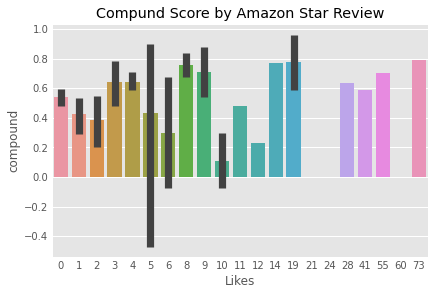

In [ ]:
ax = sns.barplot(data=vaders, x='Likes', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

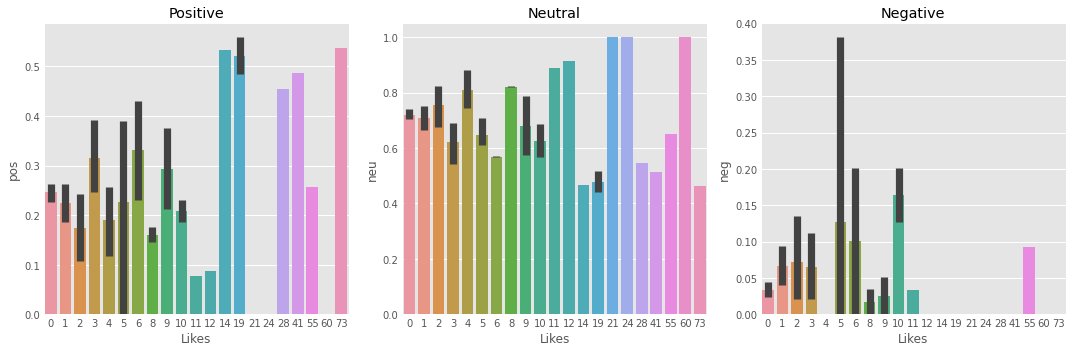

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(data=vaders, x='Likes', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Likes', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Likes', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(kim_df)):
    try:
        text = row['Tweet']
        myid = row['id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/300 [00:00<?, ?it/s]

In [ ]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'id'})
results_df = results_df.merge(df, how='left')

In [ ]:
results_df.columns

Index(['id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'Date', 'User', 'Tweet',
       'Likes'],
      dtype='object')

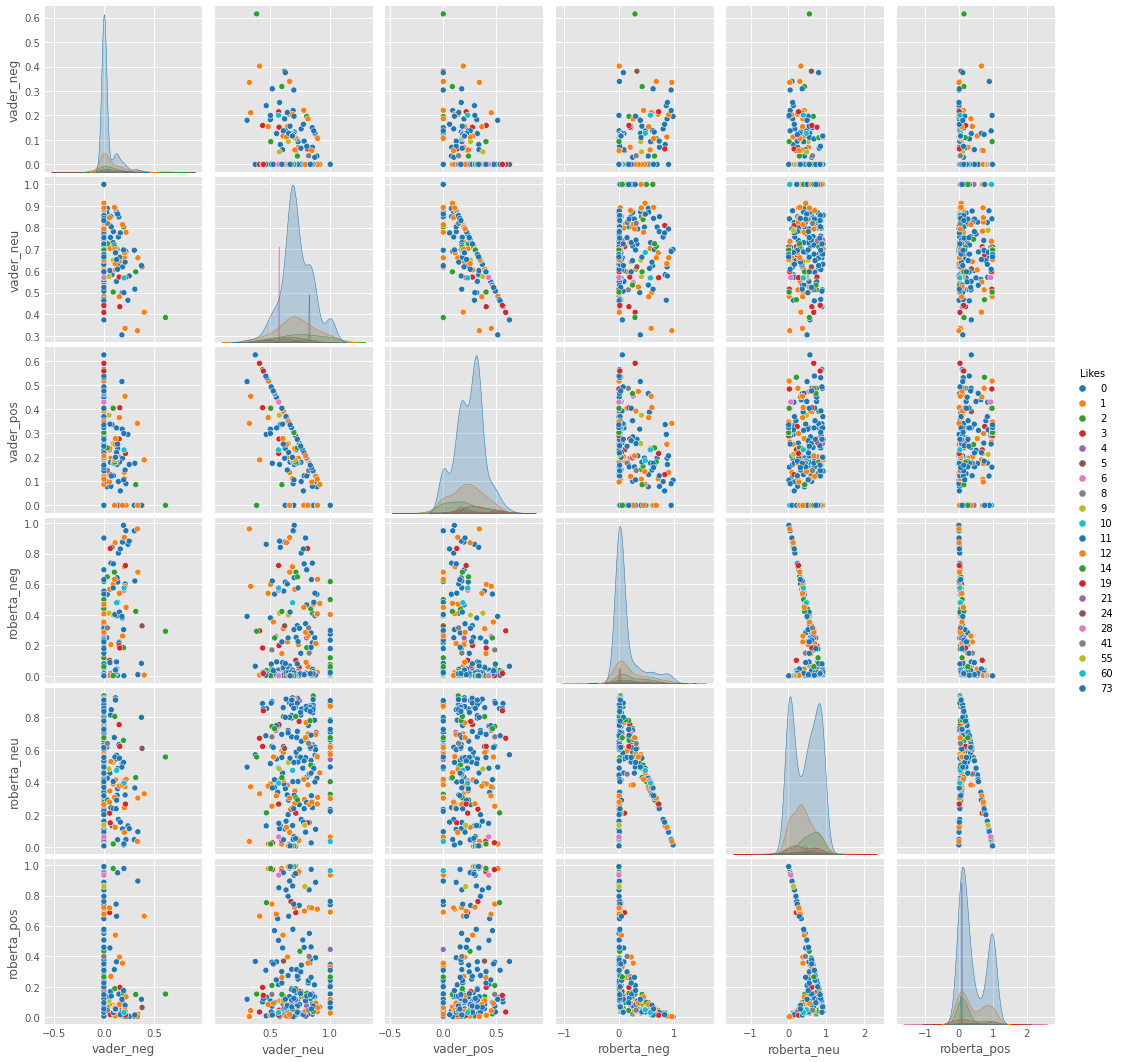

In [ ]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Likes',
            palette='tab10')
plt.show()